# Mini Akinator

### Introdução

Para obter as inferências necessárias para a construção do Mini Akinator, utilizamos a seguinte base de dados disponível no Kaggle: [Decision Tree Classification Using Zoo Animals](https://www.kaggle.com/code/carrie1/decision-tree-classification-using-zoo-animals/notebook). A partir dessa base de dados, construímos uma árvore de decisão e extraímos as regras que alimentam o Mini Akinator.


### Sobre os Dados

#### Base de Dados `zoo.csv`
A base de dados `zoo.csv` contém 101 registros de diferentes animais, cada um descrito por 17 atributos binários e categóricos, além de uma coluna que identifica o nome do animal. Esses atributos incluem características como a presença de pelos, penas, capacidade de voar, ser aquático, entre outros. A coluna final, `class_type`, classifica os animais em uma das 7 classes predefinidas, que são numeradas de 1 a 7.

**Atributos:**
- `animal_name`: Nome do animal.
- `hair`: Possui pelos (0 ou 1).
- `feathers`: Possui penas (0 ou 1).
- `eggs`: Bota ovos (0 ou 1).
- `milk`: Produz leite (0 ou 1).
- `airborne`: Pode voar (0 ou 1).
- `aquatic`: É aquático (0 ou 1).
- `predator`: É um predador (0 ou 1).
- `toothed`: Possui dentes (0 ou 1).
- `backbone`: Possui coluna vertebral (0 ou 1).
- `breathes`: Respira (0 ou 1).
- `venomous`: É venenoso (0 ou 1).
- `fins`: Possui nadadeiras (0 ou 1).
- `legs`: Número de pernas (inteiro).
- `tail`: Possui cauda (0 ou 1).
- `domestic`: É domesticado (0 ou 1).
- `catsize`: Tamanho comparável ao de um gato (0 ou 1).
- `class_type`: Tipo de classe (de 1 a 7).

#### Base de Dados `class.csv`
A base de dados `class.csv` contém 7 registros, correspondentes às 7 classes mencionadas na base `zoo.csv`. Para cada classe, há uma descrição textual e o número de espécies de animais que pertencem a essa classe.

**Atributos:**
- `Class_Number`: Número da classe (de 1 a 7).
- `Number_Of_Animal_Species_In_Class`: Número de espécies animais na classe.
- `Class_Type`: Nome da classe (Mammal, Bird, etc.).
- `Animal_Names`: Nomes dos animais que pertencem a essa classe.

Essa estrutura de dados permite a criação de uma árvore de decisão para inferir a classe de um animal baseado em suas características, possibilitando a construção do Mini Akinator que tenta adivinhar o animal com base em respostas binárias.


In [8]:
import pandas as pd

# Carregar os arquivos CSV
zoo_df = pd.read_csv('./Data/zoo.csv')
class_df = pd.read_csv('./Data/class.csv')

# Exibir as primeiras linhas dos DataFrames para entender os dados
display(zoo_df.head())
print('\n')
print(zoo_df.info())
print('\n')
display(class_df.head())
print('\n')
print(class_df.info())

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None




,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 356.0+ bytes
None


### Dessa forma, podemos seguir com a seguinte abordagem...

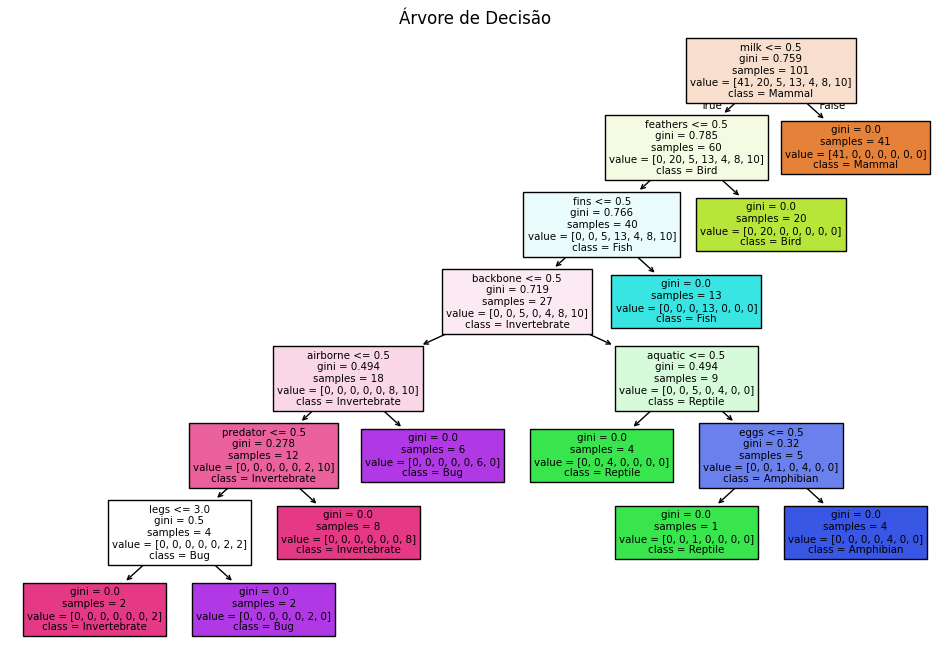

In [9]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree


# Criação do modelo
dt = DecisionTreeClassifier()
dt.fit(zoo_df.drop(['class_type', 'animal_name'], axis=1), zoo_df['class_type'])

# Plotagem da arvore
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=zoo_df.drop(['class_type', 'animal_name'], axis=1).columns, class_names=class_df['Class_Type'])
plt.title("Árvore de Decisão")
plt.show()

In [10]:
# Outra visualisação

from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=list(zoo_df.drop(['class_type', 'animal_name'], axis=1).columns))
print(tree_text)

|--- milk <= 0.50
|   |--- feathers <= 0.50
|   |   |--- fins <= 0.50
|   |   |   |--- backbone <= 0.50
|   |   |   |   |--- airborne <= 0.50
|   |   |   |   |   |--- predator <= 0.50
|   |   |   |   |   |   |--- legs <= 3.00
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- legs >  3.00
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- predator >  0.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |--- airborne >  0.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- backbone >  0.50
|   |   |   |   |--- aquatic <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- aquatic >  0.50
|   |   |   |   |   |--- eggs <= 0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- eggs >  0.50
|   |   |   |   |   |   |--- class: 5
|   |   |--- fins >  0.50
|   |   |   |--- class: 4
|   |--- feathers >  0.50
|   |   |--- class: 2
|--- milk >  0.50
|   |--- class: 1

